In [2]:
# import needed libraries for all plot and numbering stuff
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# [CONFIGS] --------------------------------------
mpl.rcParams['figure.dpi'] = 80

![](./assets/thumbnail.jpg)

# **Aufgaben 4** - *Zeitdiskrete LTI-Systeme (3)*

## Aufgabe 1

Zur Darstellung von Pol-Nullstellendiagrammen (ohne Kennzeichnung mehrfacher Nullstellen/Pole) kann folgende Funktion verwendet werden.

In [3]:
def polezeroplot(num,denum):
  zeros = np.roots(num)
  poles = np.roots(denum)
  plt.figure(num=None,figsize=(6,6),facecolor='w',edgecolor='k')
  plt.plot(np.real(zeros),np.imag(zeros),'go')
  plt.plot(np.real(poles),np.imag(poles),'rx')
  plt.plot(np.cos(np.arange(0,2*np.pi,0.01)),np.sin(np.arange(0,2*np.pi,0.01)),'k:')
  plt.xlabel('Re{z}')
  plt.ylabel('Im{z}')
  plt.axis([-2,2,-2,2])
  plt.grid(True)
  plt.show()
  return

Untersuchen Sie folgende Systeme auf Stabilität ($N$ und $k_0$ sind positive Konstanten.):

>a. $y[k]=\frac32y[k−1]−\frac45y[k−2]+x[k]$

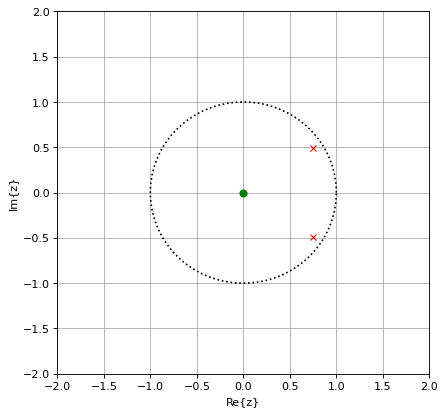

In [4]:
polezeroplot([1,0,0],[1,-1.5,0.8])


>b. $H(z)=\frac{4z^2+2z+1}{4z^3−2z^2+z}$


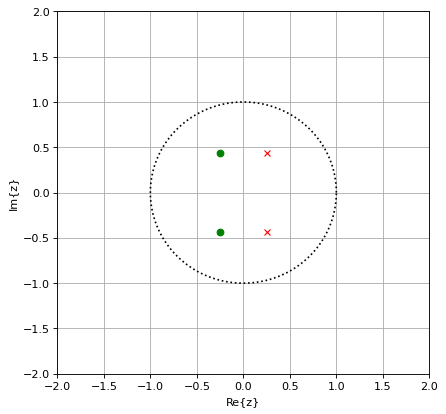

In [5]:
polezeroplot([4,2,1],[4,-2,1])

> c. $h[k]=\sum_{n=0}^N\left(\frac32\right)^n\delta[k−n]$



Da $N$ eine positive Konstante ist und somit nicht $\infty$ sein kann, ist das Signal begrenzt und somit stabil.

$$
\sum_{n=0}^N\left(\frac32\right)^n\delta[k−n] = \sum_{n=0}^N\left(\frac32\right)^n \cdot ( \varepsilon[k] - \varepsilon[ - N + k + 1])
$$

>d. $h[k]=\varepsilon[k]−\varepsilon[k−k_0]$

>e. $H(z)=\frac{z^4+z^2+1}{2z^4+2z^3−2z^2+z+1}$

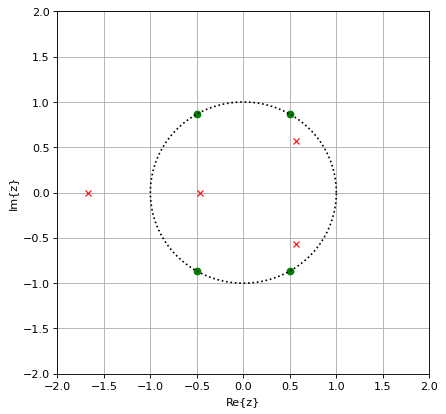

In [6]:
polezeroplot([1,0,1,0,1],[2,2,-2,1,1])

>f. $H(z)=\frac{2z^2-4}{z^3−\frac32z^2+\frac12z}$

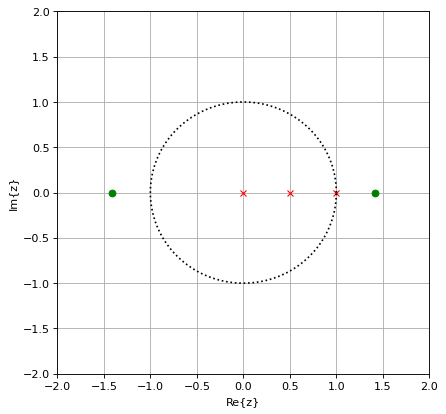

In [7]:
polezeroplot([2,0,-4],[1,-1.5,0.5,0])

## Aufgabe 2

Zeichnen Sie die Blockdiagramme der durch die folgenden Impulsantworten beschriebenen Systeme. Um welche Art von System handelt es sich jeweils?

>a. $h[k]=\left(\frac12\right)^k(\varepsilon[k]-\varepsilon[k-4])$


>b. $h[k]=\left(\frac12\right)^k\varepsilon[k]$

## Aufgabe 3

Ein zeitdiskretes LTI-System ist durch folgendes Blockdiagramm gegeben:

![alt text](https://drive.google.com/uc?id=19ZKGSAk-xKQov67yliZXmFESCzAd4HuH)

>a. Wie lautet die Differenzengleichung dieses Systems?

$$
y[k] = a \cdot x[k] + x[k-1] + b\cdot y[k-1] + c\cdot y[k-2]
$$


>b. Leiten Sie die Übertragungsfunktion her.


$$
H(z) = \frac{a + z^{-1}}{1-c\cdot z^{-2} - b \cdot z^{-1}} = \frac{a\cdot z^2+z}{z^2-b\cdot z - c}
$$


>c. Bestimmen Sie ein einfaches Kriterium für die Stabilität des Systems unter der Voraussetzung, dass $a$, $b$, $c$ positive Grössen sind.


$$
\text{Polstellen}: z^2 - b\cdot z - c = 0 \rightarrow \alpha_{1,2} = \frac{b \pm \sqrt{b^2 + 4\cdot c}}{2}
$$

$$

$$


>d. Bestimmen Sie die die ersten drei Koeffizienten der Impulsantwort (also $h[0]$, $h[1]$, $h[2]$).


- $h[0] = a$
- $h[1] = 1 + ab$
- $h[2] = b(1 + ab) + ac$


>e. Verifizieren Sie Ihre Lösungen für c. und d. ausgehend von der Differenzengleichung mit einem Python-Skript.


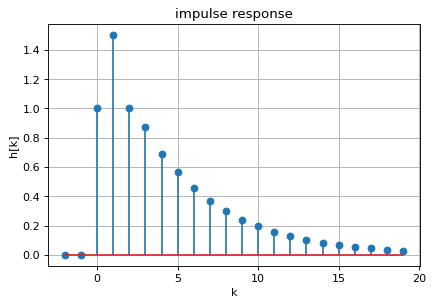

In [11]:
def next_y(x,y,a,b,c):
  return a*x[-1]+x[-2]+b*y[-1]+c*y[-2] # [-1] => takes last element of array
                                       # [-2] => take second last element of array
a = 1
b = 0.5
c = 0.25
x = [ 0, 1]
y = [ 0, 0]
#k = -1, 0
for i in range(20):
  y.append(next_y(x,y,a,b,c))
  x.append(0)

plt.stem(range(-2,20),y)
plt.title('impulse response')
plt.xlabel('k')
plt.ylabel('h[k]')
plt.grid(True)
plt.show()